#  Predicting real estate prices.

### Data description and task statement
The task is to build a model that determines the probability of" default " of the borrower. Two tables are provided for training the model. In ACCOUNTS - the customer's Id and its history (payment history, legal status of the person, loan term, loan purpose, etc.), in CUSTOMERS-the account Id and whether or not the default occurred. Also, a breakdown is made for which clients to train the model and for which they will be checked.


### Importing libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

#import machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 

from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.externals import joblib #save model

from xgboost import XGBClassifier
import xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve


### Getting the values and viewing the tables.

In [4]:
#SampleAccounts  = pd.read_csv("C:/Users/User/Desktop/python/Обучение/dataset/nedv_test_t.csv", delimiter=';');
#SampleCustomers  = pd.read_csv("C:/Users/User/Desktop/python/Обучение/dataset/nedv_train_t.csv", delimiter=';');
SampleAccounts  = pd.read_excel("C:/Users/User/Desktop/python/Обучение/dataset/nedv_test_t.xlsx");
SampleCustomers  = pd.read_excel("C:/Users/User/Desktop/python/Обучение/dataset/nedv_train_t.xlsx");

# соединим две таблицы.
#data = pd.concat([y_2018,y_2019],sort=False)
#data



In [5]:
data = SampleCustomers.copy()
#data

###  The analyzed table.

In [6]:
# sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# plt.title('Title', y=1.75, size=15)
# fig=plt.gcf()
# fig.set_size_inches(25,25)
# plt.show()

In [7]:
#data.corr()
correlations_data = data.corr()['цена_продажа'].sort_values()
#correlations_data

In [8]:
# процент пропущенный значений
for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        if pct_missing  != 0:
            print('{} - {}%'.format(col, round(pct_missing*100)))            

жилая площадь - 20.0%
этаж - 1.0%
макс этажи - 38.0%
из чего изготовлен - 38.0%
год постройки - 50.0%
число комнат - 38.0%
площадь кухни - 38.0%
состояние жилья - 51.0%
вместимость дет.садов - 21.0%
вместимость школ - 21.0%
кол-во больничных коек на райоене - 47.0%


In [146]:
# может удалить в цикле с пропусками более 50 код в Счастье.

Immediately delete those whose correlation is close to zero. BUT remember that there will be categorical data and so on, so we will delete it wisely.

Deleting extra columns

In [9]:
# на всякий случай сделаем копию датафрейма 

df_main = data
drop_elements = ['вместимость дет.садов', 'кол-во школьников', 'вместимость школ', 
                 'число школ в рейтинге ТОП 20 школ москвы','кол-во дошкольников']
df_main = df_main.drop(drop_elements, axis=1)

# И еще удалим  признаки, у которых: 
# - очень слабые "связи", и они могут испортить наши модели, внеся шум.

drop_elements2 = ['id','timestamp','кол-во больничных коек на райоене']
df_main = df_main.drop(drop_elements2, axis=1)
data=df_main

In [10]:
data

,площадь,жилая площадь,этаж,макс этажи,из чего изготовлен,год постройки,число комнат,площадь кухни,состояние жилья,тип жилья,...,кол-во школ на районе,кол-во больниц на районе,число университетов в ТОП 20 университетов москвы,кол-во спортивных объектов на районе,кол-во школ допольнительного обучения на районе,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы","кол-во культурных объектов, входящих в ТОП 25 объектов Москвы",Кол-во торговых центров на районе,Кол-во офисов на районе,цена_продажа
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,5,1,0,7,3,no,0,16,1,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,8,1,0,6,1,yes,1,3,0,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,7,1,0,5,1,no,0,0,1,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,10,1,0,17,6,no,0,11,4,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,9,4,2,25,2,no,0,10,93,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,37,19.0,16.0,16.0,1.0,1986.0,1.0,10.0,2.0,Investment,...,6,2,0,3,2,no,0,5,9,6600000
24993,72,NaN,2.0,17.0,1.0,NaN,2.0,1.0,1.0,OwnerOccupier,...,0,0,0,3,3,no,0,2,3,8590436
24994,40,NaN,1.0,0.0,1.0,NaN,1.0,0.0,NaN,OwnerOccupier,...,0,0,0,0,1,no,0,0,0,4295979
24995,51,30.0,8.0,12.0,1.0,1966.0,2.0,10.0,2.0,Investment,...,3,0,0,3,2,no,0,5,3,8100000


We can rename columns.

In [11]:
#! pip install transliterate
import transliterate
#numerics = numerics.rename(columns=lambda x: x+'x') # Добавит х к названиям стоблцов
numerics = data.copy()

result = [] # созадем серию чтобы к ней прибалять result.append(col)
for col in numerics.columns:
    col = col.replace(' ','_')[:15]
    col = col.replace('-','_')
    col = col.replace('ь','')
    col = col.replace('ъ','')
    col=transliterate.translit(col, 'ru', reversed=True)
    result.append(col) 
numerics.columns = result
numerics.columns 


Index(['ploschad', 'zhilaja_ploschad', 'etazh', 'maks_etazhi',
       'iz_chego_izgotov', 'god_postrojki', 'chislo_komnat', 'ploschad_kuhni',
       'sostojanie_zhilja', 'tip_zhilja', 'rajon', 'ploschad_rajona',
       'chiso_zhitelej', 'ploschad_zelenoj', 'ploschad_industr',
       'kol_vo_det.sado', 'kol_vo_shkol_na_', 'kol_vo_bolnits_',
       'chislo_universit', 'kol_vo_sportivn', 'kol_vo_shkol_dop',
       'est_li_kultur', 'kol_vo_kulturn', 'Kol_vo_torgovyh', 'Kol_vo_ofisov_n',
       'tsena_prodazha'],
      dtype='object')

In [12]:
# для боевых задач быстрее так
#data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']

### Remove the emissions

In [13]:
data.columns

Index(['площадь', 'жилая площадь', 'этаж', 'макс этажи', 'из чего изготовлен',
       'год постройки', 'число комнат', 'площадь кухни', 'состояние жилья',
       'тип жилья', 'район', 'площадь района', 'чисо жителей',
       'площадь зеленой зоны', 'площадь индустриальной зоны',
       'кол-во дет.садов на районе', 'кол-во школ на районе',
       'кол-во больниц на районе',
       'число университетов в ТОП 20 университетов москвы',
       'кол-во спортивных объектов на районе',
       'кол-во школ допольнительного обучения на районе',
       'есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы',
       'кол-во культурных объектов, входящих в ТОП 25 объектов Москвы',
       'Кол-во торговых центров на районе', 'Кол-во офисов на районе',
       'цена_продажа'],
      dtype='object')

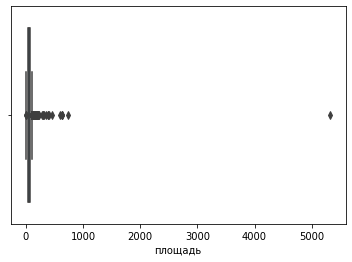

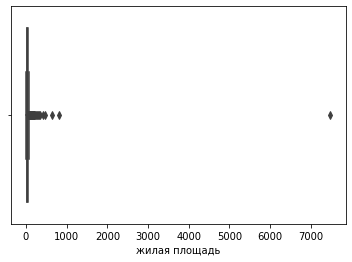

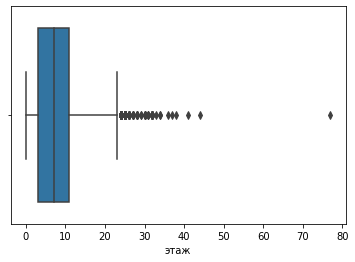

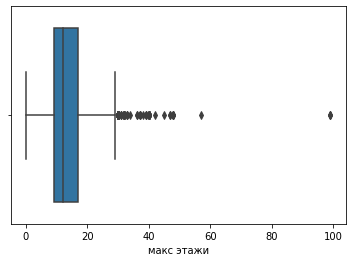

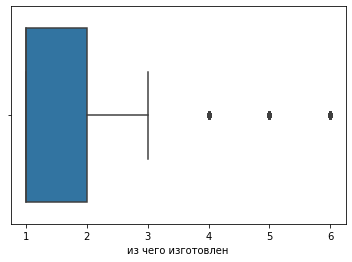

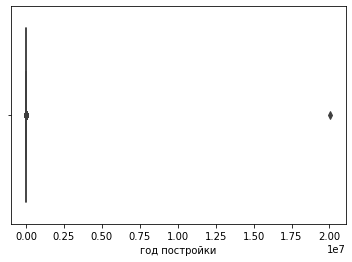

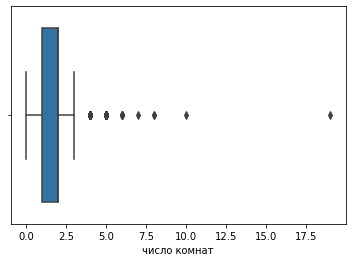

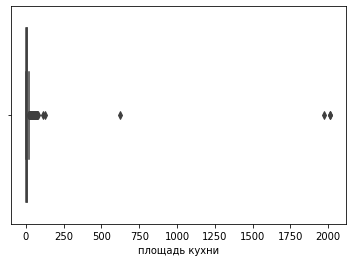

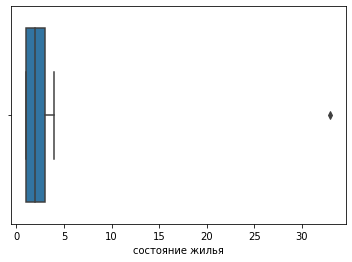

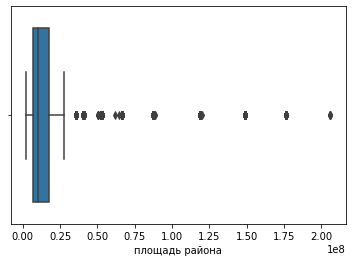

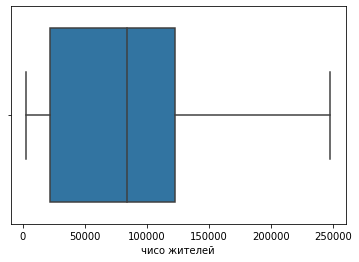

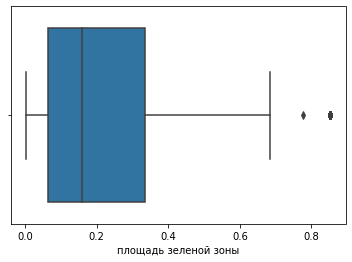

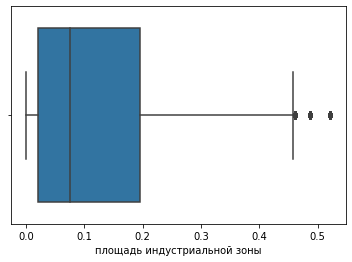

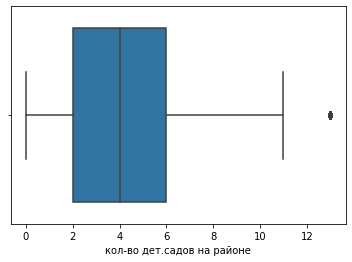

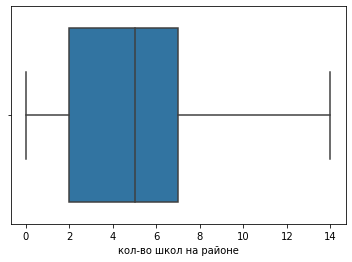

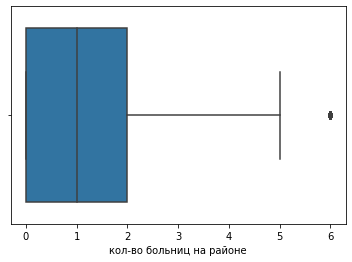

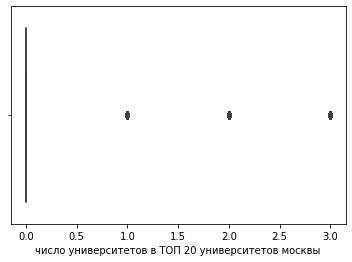

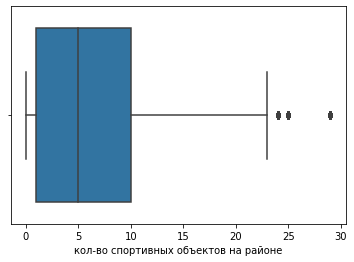

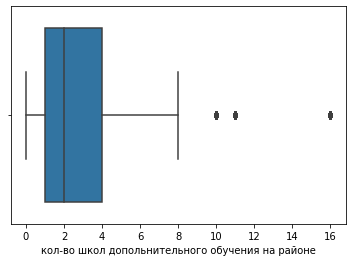

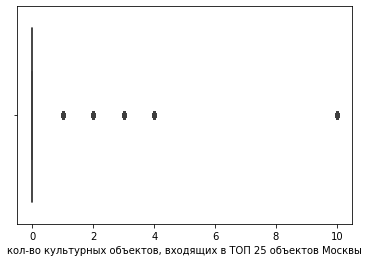

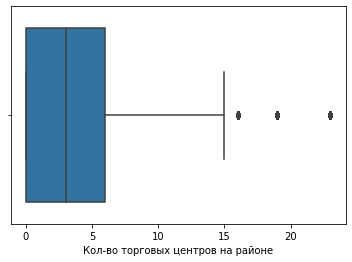

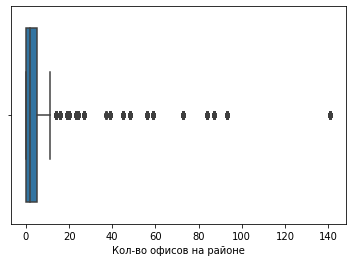

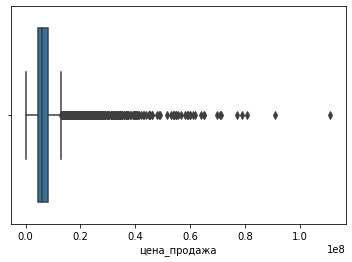

In [14]:
#data[data["жилая площадь"].isnull()]
#data.describe().T
#column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
numerics=data
for col in numerics.columns:
    if(numerics[col].dtype == np.float64 or numerics[col].dtype == np.int64):
        sns.boxplot(x = numerics[col])
        plt.xlabel(col)
        plt.show()

In [15]:
data.drop(data[((data['площадь'] < 20) | (data['площадь'] > 170)) & (data['площадь'] !=0)].index, inplace = True) 
data.drop(data[((data['жилая площадь'] < 17) | (data['жилая площадь'] > 150)) & (data['жилая площадь']!=0)].index, inplace = True) 
data.drop(data[((data['этаж'] < 1) | (data['этаж'] > 25)) & (data['этаж']!=0)].index, inplace = True) 
data.drop(data[((data['год постройки'] < 1940) | (data['год постройки'] > 2020)) & (data['год постройки']!=0)].index, inplace = True) 
data.drop(data[(data['макс этажи'] > 25) & (data['макс этажи']!=0)].index, inplace = True)  
data.drop(data[((data['площадь кухни'] < 5) | (data['площадь кухни'] > 20)) & (data['площадь кухни']!=0)].index, inplace = True)
data.drop(data[((data['число комнат'] < 1) | (data['число комнат'] > 5)) & (data['число комнат']!=0)].index, inplace = True)

# В каждом случае можем посмотредь диаграмму
data['жилая площадь']

0        27.0
1        19.0
2        29.0
3        50.0
4        77.0
         ... 
24991    20.0
24992    19.0
24994     NaN
24995    30.0
24996    82.0
Name: жилая площадь, Length: 20435, dtype: float64

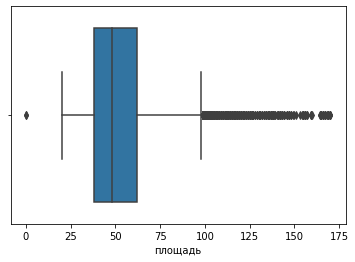

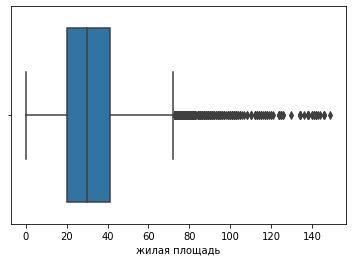

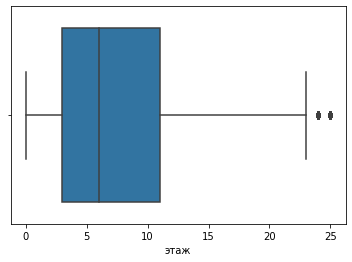

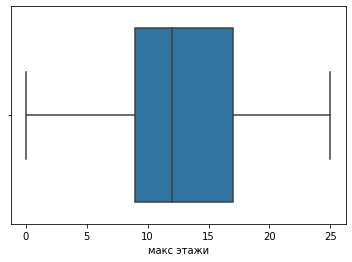

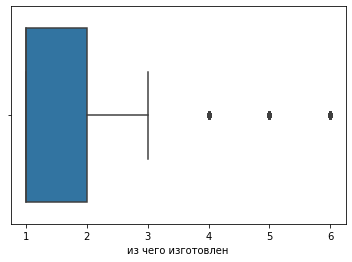

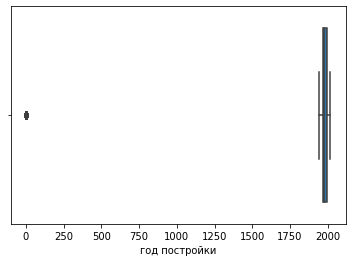

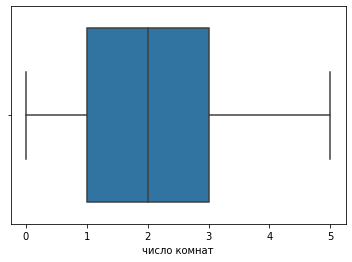

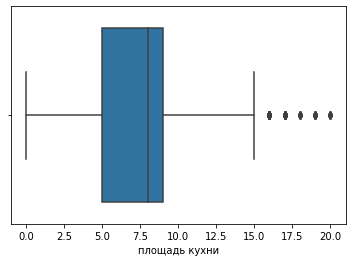

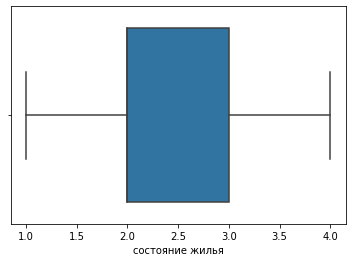

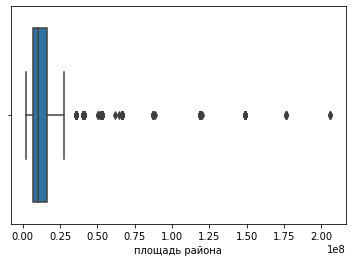

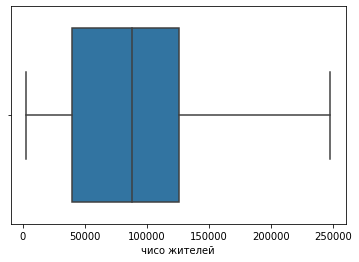

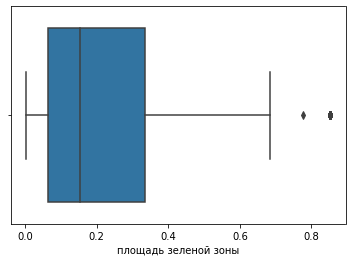

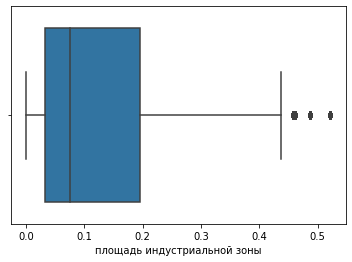

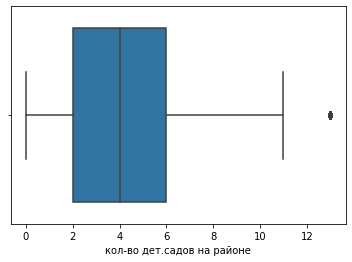

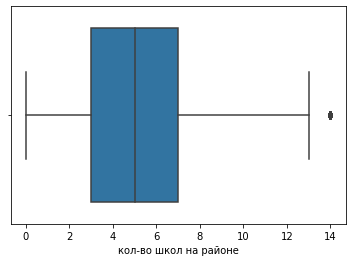

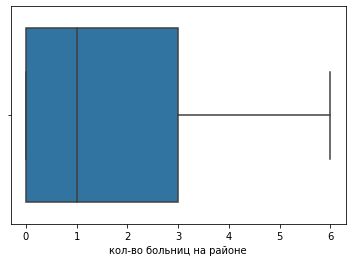

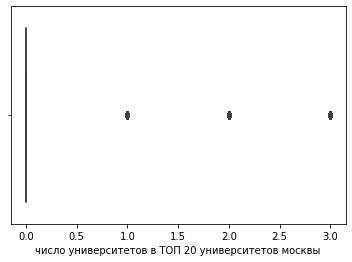

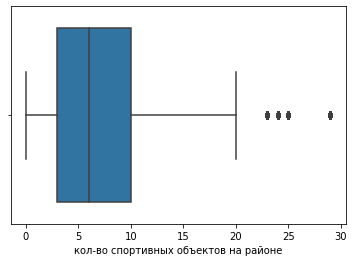

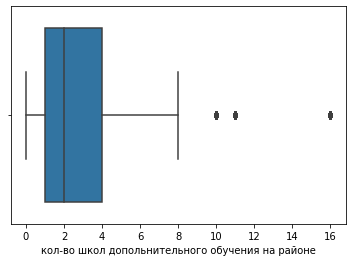

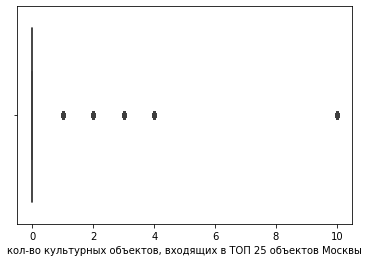

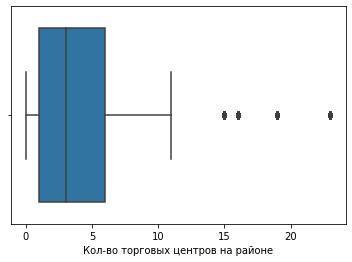

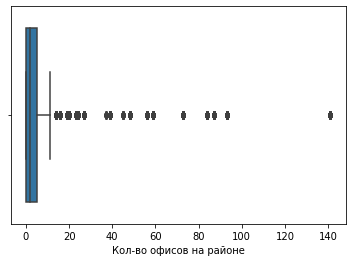

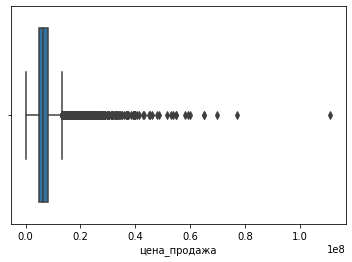

In [16]:
#data[data["жилая площадь"].isnull()]
#data.describe().T
#column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
numerics=data
for col in numerics.columns:
    if(numerics[col].dtype == np.float64 or numerics[col].dtype == np.int64):
        sns.boxplot(x = numerics[col])
        plt.xlabel(col)
        plt.show()

### Clearing data

In [17]:
# процент пропущенный значений
for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        if pct_missing  != 0:
            print('{} - {}%'.format(col, round(pct_missing*100)))

жилая площадь - 15.0%
этаж - 1.0%
макс этажи - 45.0%
из чего изготовлен - 45.0%
год постройки - 50.0%
число комнат - 45.0%
площадь кухни - 45.0%
состояние жилья - 54.0%


#### Where there is a dependency of omitted with other signs, we calculate. Where there isn't just put 0 or the median

In [18]:
# жил площадь связана с площадью. надйем коэфициент
koef=data['площадь'].mean(axis=0)/data['жилая площадь'].mean(axis=0) # коэфициент зависимости
print (data['площадь'].mean(axis=0),data['жилая площадь'].mean(axis=0),koef )
data["жилая площадь"]= data["жилая площадь"].fillna(data["площадь"]/koef)

52.85935894298997 33.0594482280965 1.5989183660381228


Fill in the missing values for categorical features with the most common ones, and for numeric ones with zeros or averages.
Next, we will experiment whether 0 or the median is better.

#### First fill in the zeros, then the median. after training the model we look at what ekxit

In [31]:
#df.final_pmt_date.fillna(0, inplace=True)
#numerical_columns = numerical_columns.fillna(numerical_columns.median(axis=0), axis=0)
#df.fillna(0, inplace=True) 
# категориельные наиболее частыми
data_describe = data.describe(include=[object])
for c in data_describe:
    data[c] = data[c].fillna(data_describe[c]['top'])
    
# числовые нулями   
data.fillna(0, inplace=True) 


Проверяем

In [32]:
# процент пропущенный значений
for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        if pct_missing  != 0:
            print('{} - {}%'.format(col, round(pct_missing*100)))

### we divide it into categories

In [33]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print ("Cat_")
print (categorical_columns)
print ("Num_")
print (numerical_columns)
data[categorical_columns].describe()

Cat_
['тип жилья', 'район', 'есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы']
Num_
['площадь', 'жилая площадь', 'этаж', 'макс этажи', 'из чего изготовлен', 'год постройки', 'число комнат', 'площадь кухни', 'состояние жилья', 'площадь района', 'чисо жителей', 'площадь зеленой зоны', 'площадь индустриальной зоны', 'кол-во дет.садов на районе', 'кол-во школ на районе', 'кол-во больниц на районе', 'число университетов в ТОП 20 университетов москвы', 'кол-во спортивных объектов на районе', 'кол-во школ допольнительного обучения на районе', 'кол-во культурных объектов, входящих в ТОП 25 объектов Москвы', 'Кол-во торговых центров на районе', 'Кол-во офисов на районе', 'цена_продажа']


,тип жилья,район,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы"
count,20435,20435,20435
unique,2,146,2
top,Investment,Poselenie Sosenskoe,no
freq,15118,1126,19415


In [34]:
for c in categorical_columns:
    print (data[c].unique())

['Investment' 'OwnerOccupier']
['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'Obruchevskoe' 'Filevskij Park'
 'Troparevo-Nikulino' 'Severnoe Butovo' 'Hamovniki' 'Solncevo' 'Lianozovo'
 'Pechatniki' 'Krjukovo' 'Ja

In [35]:
data['есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы'].value_counts(dropna=False) 

no     19415
yes     1020
Name: есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы, dtype: int64

Разобьем на бинарные и прочие >2

In [36]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['тип жилья', 'есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы'] ['район']


In [37]:
data['есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы'].value_counts(dropna=False) 

no     19415
yes     1020
Name: есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы, dtype: int64

In [38]:
#data = SampleCustomers.copy()

быстрый но некоретный способ

In [39]:
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1
data[binary_columns]


,тип жилья,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы"
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
24991,0,0
24992,0,0
24994,1,0
24995,0,0


Более правльный вариант разбивки. На рабочей моделе четко указаны поля и вариации.

In [41]:

df = data

# половой признак переведем в числа

# df['тип жилья'] = df['тип жилья'].map({'Investment': 0, 
#                                  'OwnerOccupier': 1}).astype(int)

# С помощью цилка для колонок с 2-мя категориями: 'yes' или 'no'

# list_yes_no = ['есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы']
# for column in list_yes_no:
#     df[column] = df[column].map({'no': 0, 
#                                  'yes': 1}).astype(int)
    
#df['timestamp']=df['timestamp'].dt.year если нужно в дату

#там где много признаков/ разбивает в ряд. не добавляет новые. делать если до 5 кат.   

le = preprocessing.LabelEncoder()
le.fit(df['район'])
df['район']=le.transform(df['район'])
#list(le.inverse_transform(df['район'])) # обратное декодирование
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le.fit(df['год постройки'])
df['год постройки']=le.transform(df['год постройки'])

# from sklearn import preprocessing 
# label_encoder = preprocessing.LabelEncoder() 
# label_encoder.fit(df['район']) 
# label_encoder.transform(df['район']) 

# районов очень много. добаляем стоблцы.
data_nonbinary = pd.get_dummies(df['район'])
print (data_nonbinary.columns)

# надо учесть что стоблец район надо выкинут.
#  соединяем все в один 

data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)

data

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            136, 137, 138, 139, 140, 141, 142, 143, 144, 145],
           dtype='int64', length=146)


NameError: name 'data_numerical' is not defined

### Normalize

In [42]:
dataframe=data.copy()
#dataframe

#Standardization
# scale_features_std = StandardScaler() 
# array = dataframe['цена_продажа'].values.reshape(-1, 1)
# features_train = scale_features_std.fit_transform(array) 
# features_test = scale_features_std.transform(array) 
# dataframe['цена_продажа']=features_train

# Feature scaling with MinMaxScaler 
# from sklearn.preprocessing import MinMaxScaler 
# scale_features_mm = MinMaxScaler() 
# features_train = scale_features_mm.fit_transform(features_train) 
# features_test = scale_features_mm.transform(features_test) 

dataframe['цена_продажа']

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
24991     5100000
24992     6600000
24994     4295979
24995     8100000
24996     8109738
Name: цена_продажа, Length: 20435, dtype: int64

In [43]:

array = dataframe['цена_продажа'].values.reshape(-1, 1)
#data_scaler = StandardScaler().fit(array)
#data_rescaled = data_scaler.transform(array)
#data_rescaled2 = MinMaxScaler().fit_transform(array)

min_max_scaler = preprocessing.MinMaxScaler(array)
dataframe['цена_продажа'] = MinMaxScaler().fit_transform(array)
# dataframe['цена_продажа']
#dataframe['цена_продажа']=round(dataframe['цена_продажа'],1)+2
#dataframe['цена_продажа']=dataframe['площадь индустриальной зоны']
dataframe['цена_продажа']

0        0.051797
1        0.053148
2        0.050445
3        0.117105
4        0.146215
           ...   
24991    0.045041
24992    0.058553
24994    0.037798
24995    0.072065
24996    0.072153
Name: цена_продажа, Length: 20435, dtype: float64

In [44]:
data_numerical = data[numerical_columns]
dataframe = (data_numerical - data_numerical.mean()) / data_numerical.std()
#dataframe['площадь']=dataframe['площадь'].astype("int")
dataframe['площадь']


0       -0.516653
1       -0.988273
2       -0.516653
3        1.893852
4        1.265025
           ...   
24991   -1.145480
24992   -0.831067
24994   -0.673860
24995   -0.097435
24996    1.527036
Name: площадь, Length: 20435, dtype: float64

In [45]:
# data = pd.concat((data_numerical, data[binary_columns]), axis=1)
# data = pd.DataFrame(data, dtype=float)
# data

In [168]:
df=dataframe

X = df.drop(['цена_продажа'], axis=1)
y = df['цена_продажа']

# зададим параметры для всех обучающих признаков 
TEST_SIZE = 0.3 
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)
#df.info()

In [169]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=40)
tree.fit(X_train, y_train)
predicted_y = tree.predict(X_test)
print('Accuracy: {:.2f}'.format(tree.score(X_test, y_test)))
y_test_preds_tree = tree.predict(X) # здесь будет храниться весь массив предсказанных ответов

Accuracy: 0.04


In [ ]:
# SVC
SVC_model = SVC()  
SVC_model.fit(X_train, y_train)
predicted_y = SVC_model.predict(X_test)
print('Accuracy: {:.2f}'.format(SVC_model.score(X_test, y_test)))     
# здесь будет храниться весь массив предсказанных ответов
y_test_preds_SVC_model = SVC_model.predict(X) # здесь будет храниться весь массив предсказанных ответов

In [ ]:
# GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted_y = clf.predict(X_test)
y_test_preds_clf = clf.predict(X) # здесь будет храниться весь массив предсказанных ответов
print('Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=40)
tree.fit(X_train, y_train)
predicted_y = tree.predict(X_test)
print('Accuracy: {:.2f}'.format(tree.score(X_test, y_test)))
y_test_preds_tree = tree.predict(X) # здесь будет храниться весь массив предсказанных ответов

In [12]:
# или так
data['тип жилья'].value_counts(dropna=False) 

Investment       3148
OwnerOccupier    2325
Name: тип жилья, dtype: int64

In [ ]:
# удалим нулевой столбец, он не нужен
df = data
#df = df.drop(columns='id')

# половой признак переведем в числа
df['тип жилья'] = df['тип жилья'].map({'Investment': 0, 
                                 'OwnerOccupier': 1}).astype(int)

# С помощью цилка для колонок с 2-мя категориями: 'yes' или 'no'
list_yes_no = ['есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы']
for column in list_yes_no:
    df[column] = df[column].map({'no': 0, 
                                 'yes': 1}).astype(int)
    
#df['timestamp']=df['timestamp'].dt.year если нужно в дату

#там где много признаков    
le = preprocessing.LabelEncoder()
le.fit(df['район'])
df['район']=le.transform(df['район'])
#list(le.inverse_transform(df['район'])) # обратное декодирование
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [14]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

NameError: name 'data_describe' is not defined

In [121]:
# процент пропущенный значений
data=SampleCustomers
for col in data.columns:
        pct_missing = np.mean(data[col].isnull())
        if pct_missing  != 0:
            print('{} - {}%'.format(col, round(pct_missing*100)))

жилая площадь - 20.0%
этаж - 1.0%
макс этажи - 38.0%
из чего изготовлен - 38.0%
год постройки - 50.0%
число комнат - 38.0%
площадь кухни - 38.0%
состояние жилья - 51.0%
вместимость дет.садов - 21.0%
вместимость школ - 21.0%
кол-во больничных коек на райоене - 47.0%


Из жизни мы знаем что: 

-вместимость дет.садов - 21.0%
-вместимость школ - 21.0%
-кол-во больничных коек на райоене - 47.0%

все это второстепенные показатели. Просто заполним нулями. Хотя сопоставив районы с непропущенными данными можно былобы найти данные довольно точно.

Важные показатели, пропуски будем запонять осмысленно.

-жилая площадь - 20.0%
-этаж - 1.0%
-макс этажи - 38.0%
-из чего изготовлен - 38.0%
-год постройки - 50.0%
-число комнат - 38.0%
-площадь кухни - 38.0% 

-жилая площадь - сильна привязана к площади, запоним на основании ее.

Найдем закономерность, насколько жалая площадь зависит от общей. Для этого найдем срденюю жилую и среднюю общую площадь и просто вычислим коффэфициент. 

НО перед этим проверим данные на выбросы. Чтобы построить диаграмму посмотрим на типы данных.

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24997 entries, 0 to 24996
Data columns (total 34 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   id                                                                        24997 non-null  int64         
 1   timestamp                                                                 24997 non-null  datetime64[ns]
 2   площадь                                                                   24997 non-null  int64         
 3   жилая площадь                                                             19873 non-null  float64       
 4   этаж                                                                      24830 non-null  float64       
 5   макс этажи                                                                15425 non-null  float64       
 6   из чег

In [123]:
#! pip install transliterate
import transliterate
#numerics = numerics.rename(columns=lambda x: x+'x') # Добавит х к названиям стоблцов
numerics = data.copy()

result = [] # созадем серию чтобы к ней прибалять result.append(col)
for col in numerics.columns:
    col = col.replace(' ','_')[:15]
    col = col.replace('-','_')
    col = col.replace('ь','')
    col = col.replace('ъ','')
    col=transliterate.translit(col, 'ru', reversed=True)
    result.append(col) 
numerics.columns = result
numerics.columns 


Index(['id', 'timestamp', 'ploschad', 'zhilaja_ploschad', 'etazh',
       'maks_etazhi', 'iz_chego_izgotov', 'god_postrojki', 'chislo_komnat',
       'ploschad_kuhni', 'sostojanie_zhilja', 'tip_zhilja', 'rajon',
       'ploschad_rajona', 'chiso_zhitelej', 'ploschad_zelenoj',
       'ploschad_industr', 'kol_vo_doshkoln', 'vmestimost_det',
       'kol_vo_det.sado', 'kol_vo_shkolnik', 'vmestimost_shko',
       'kol_vo_shkol_na_', 'chislo_shkol_v_re', 'kol_vo_bolnichn',
       'kol_vo_bolnits_', 'chislo_universit', 'kol_vo_sportivn',
       'kol_vo_shkol_dop', 'est_li_kultur', 'kol_vo_kulturn',
       'Kol_vo_torgovyh', 'Kol_vo_ofisov_n', 'tsena_prodazha'],
      dtype='object')

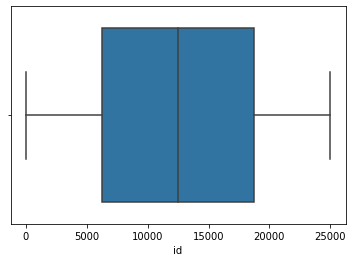

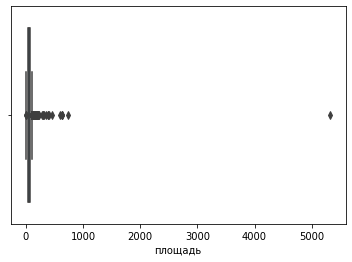

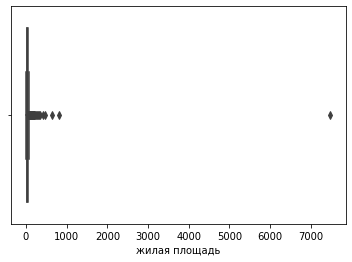

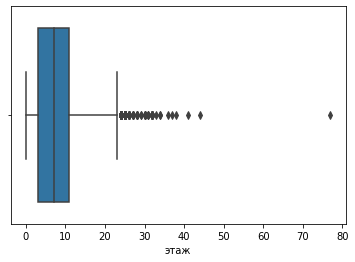

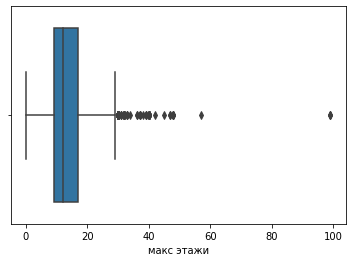

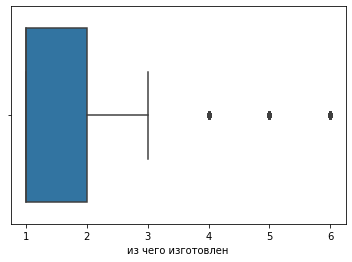

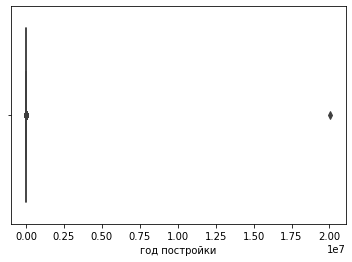

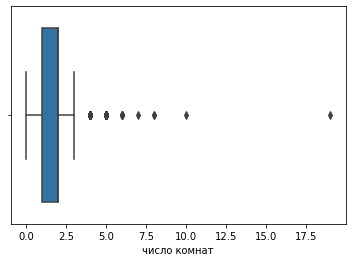

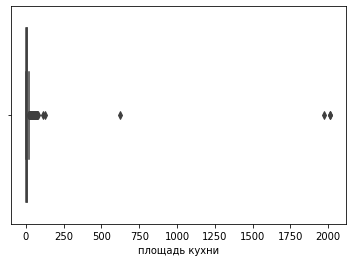

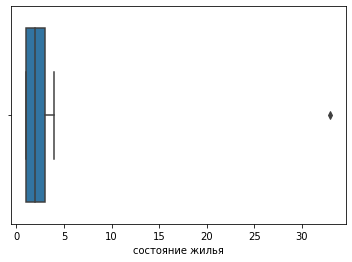

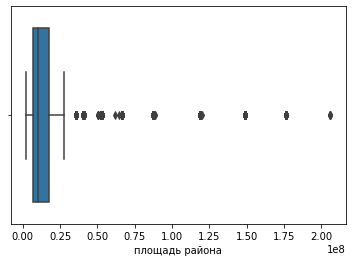

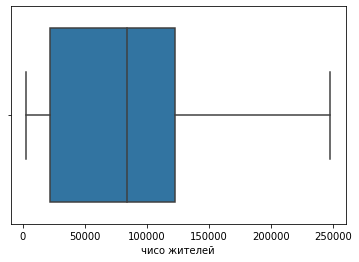

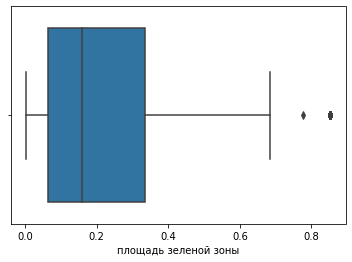

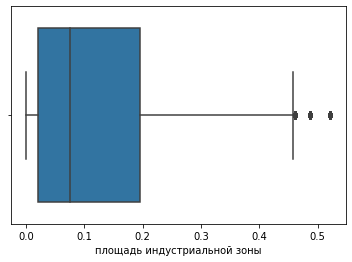

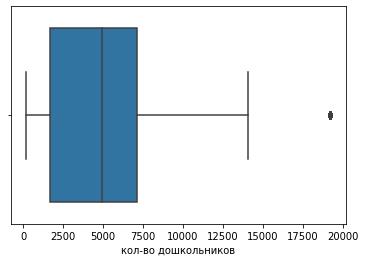

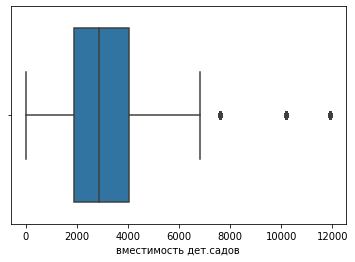

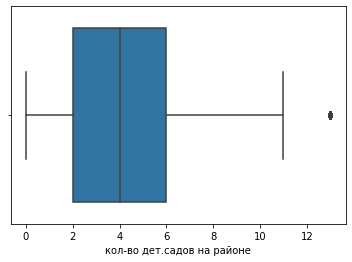

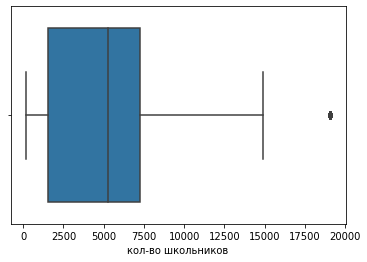

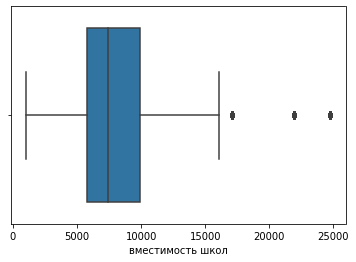

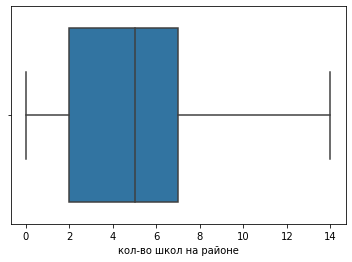

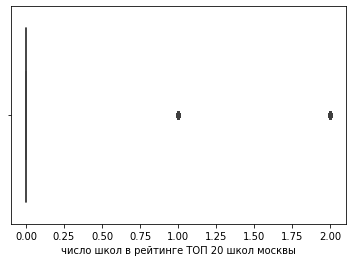

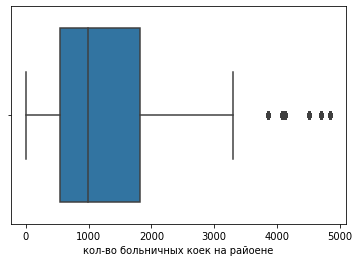

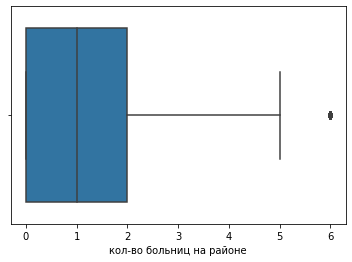

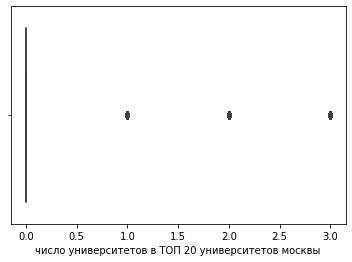

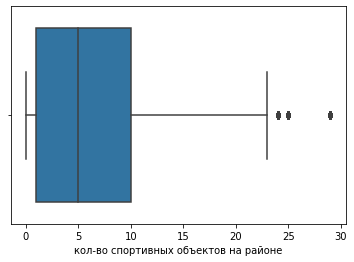

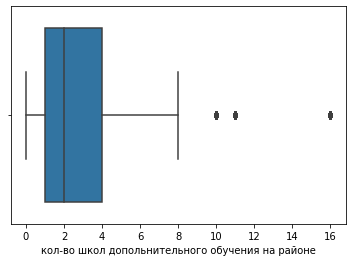

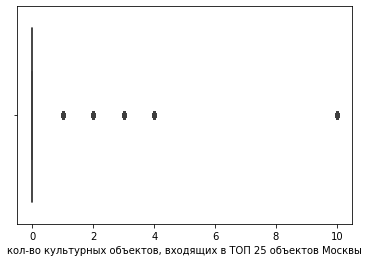

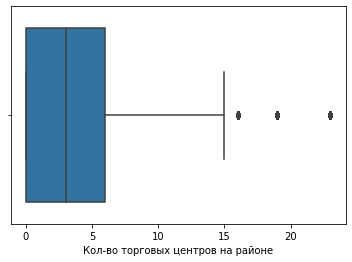

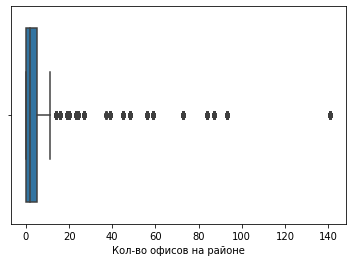

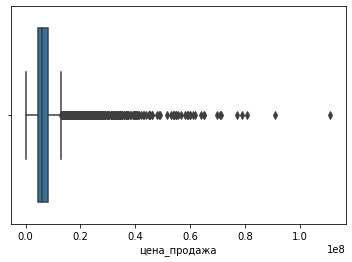

In [124]:
#data[data["жилая площадь"].isnull()]
#data.describe().T
#column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
numerics=data
for col in numerics.columns:
    if(numerics[col].dtype == np.float64 or numerics[col].dtype == np.int64):
        sns.boxplot(x = numerics[col])
        plt.xlabel(col)
        plt.show()
    

Довольно печальная картинка, выбросов много и они большие. Это и площадь в 5000 кв/м и 100 этажные здания, что конечно бывает, но нам мешает.

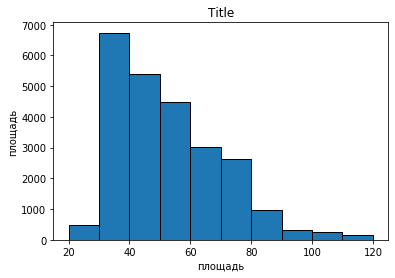

In [125]:
diap = data.drop(data[(data['площадь'] < 20) | (data['площадь'] > 120)].index)  # удаление в дипазоне

plt.hist(diap['площадь'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('площадь'); plt.ylabel('площадь');
plt.title('Title');
data=diap

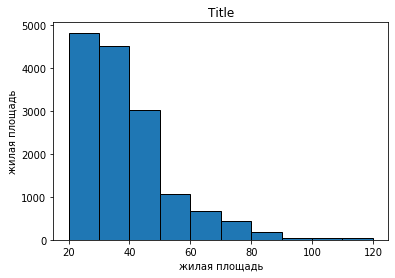

In [126]:
diap = data.drop(data[(data['жилая площадь'] < 20) | (data['жилая площадь'] > 150)].index)  # удаление в дипазоне

plt.hist(diap['жилая площадь'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('жилая площадь'); plt.ylabel('жилая площадь');
plt.title('Title');

data=diap

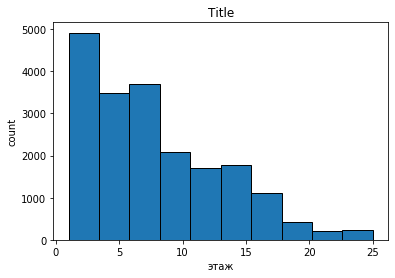

In [127]:
diap = data.drop(data[(data['этаж'] < 1) | (data['этаж'] > 25)].index)  # удаление в дипазоне

plt.hist(diap['этаж'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('этаж'); plt.ylabel('count');
plt.title('Title');
data=diap

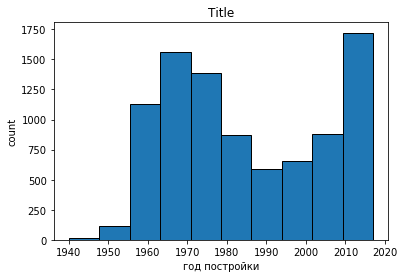

In [128]:
diap =data.drop(data[(data['год постройки'] < 1940) | (data['год постройки'] > 2020)].index)  # удаление в дипазоне
plt.hist(diap['год постройки'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('год постройки'); plt.ylabel('count');
plt.title('Title');
data=diap

In [129]:
data = data.drop(data[(data['макс этажи'] < 1) | (data['макс этажи'] > 25)].index)  # удаление в дипазоне
data = data.drop(data[(data['площадь кухни'] < 5) | (data['площадь кухни'] > 20)].index)
data = data.drop(data[(data['число комнат'] < 1) | (data['число комнат'] > 5)].index)

final_pmt_date - 7.0%  не так много. Можно обыло бы удалить, но в наборе есть еще FACT_CLOSE_DATE -финальная дата платежа. Сделаем так. Если значения final_pmt_date пропущено а FACT_CLOSE_DATE есть то прировняем значения, а если нет то удалим. 

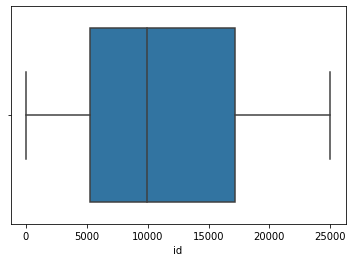

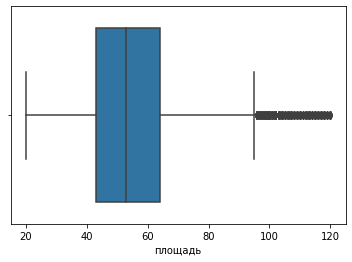

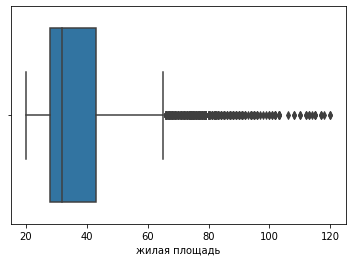

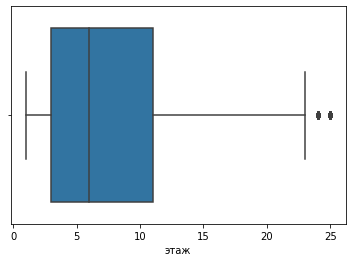

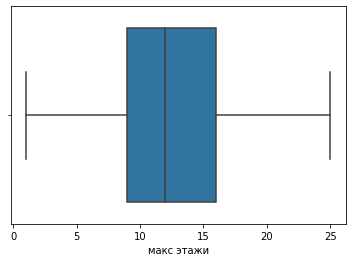

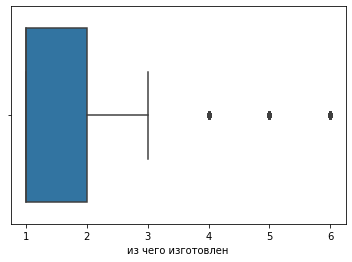

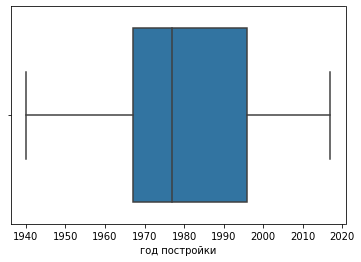

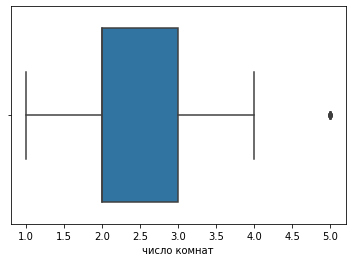

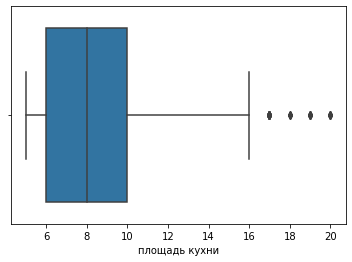

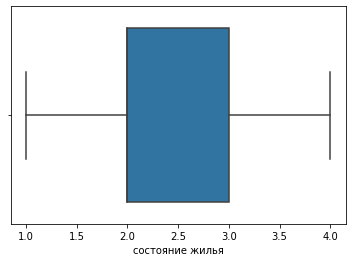

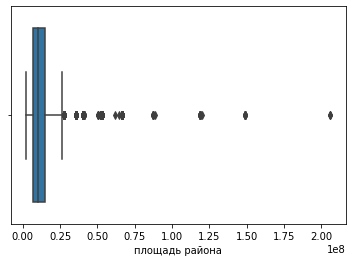

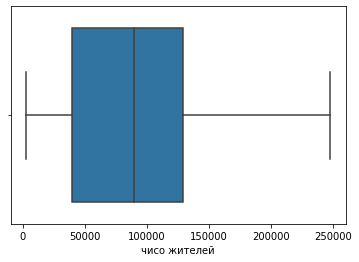

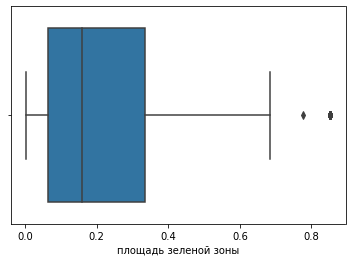

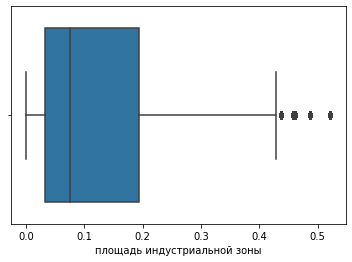

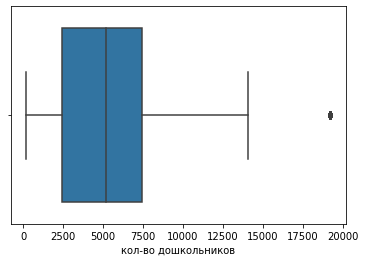

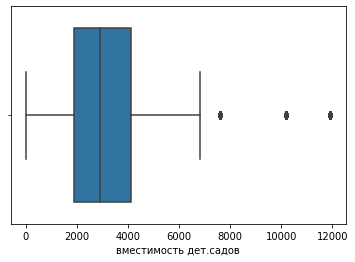

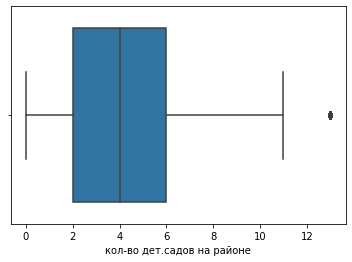

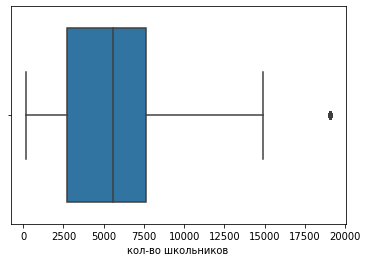

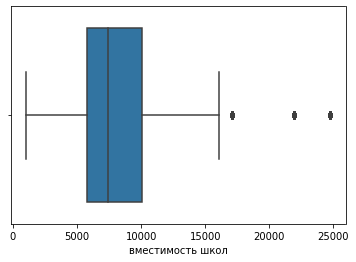

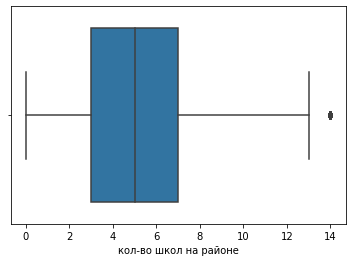

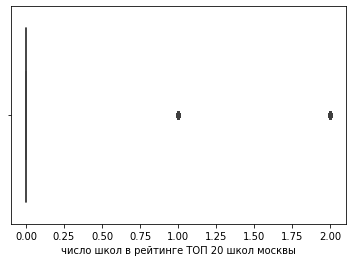

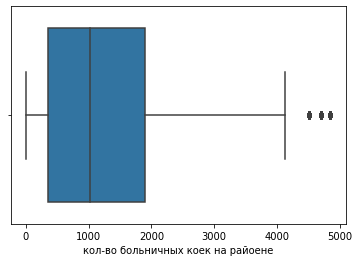

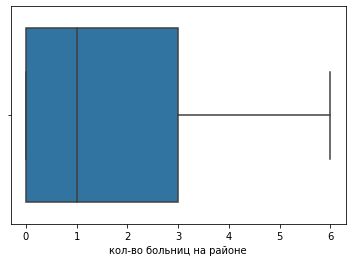

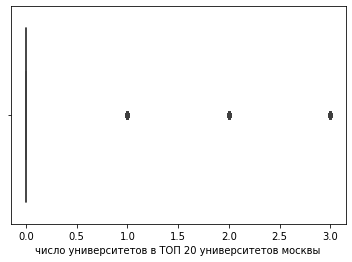

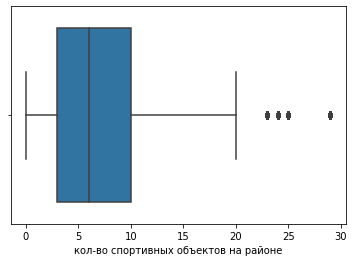

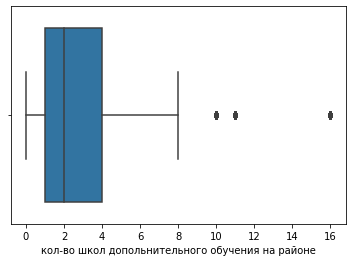

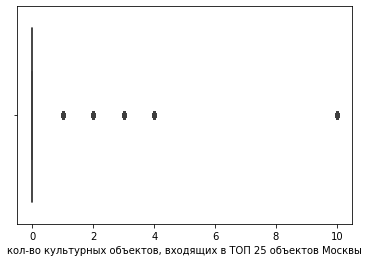

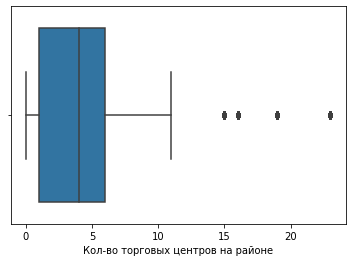

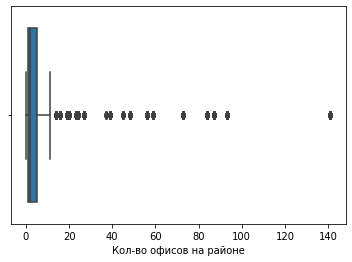

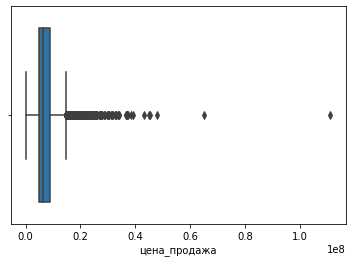

In [130]:
numerics=data
for col in numerics.columns:
    if(numerics[col].dtype == np.float64 or numerics[col].dtype == np.int64):
        sns.boxplot(x = numerics[col])
        plt.xlabel(col)
        plt.show()

In [131]:
koef=data['площадь'].mean(axis=0)/data['жилая площадь'].mean(axis=0) # коэфициент зависимости
print (data['площадь'].mean(axis=0),data['жилая площадь'].mean(axis=0),koef )
data["жилая площадь"]= data["жилая площадь"].fillna(data["площадь"]/koef)

55.42758886674809 36.0662276718135 1.5368280090480848


Было 7% стало 6% не многого добились. Удлим эти 6%

Посмотрим корреляцию на данном этапе.

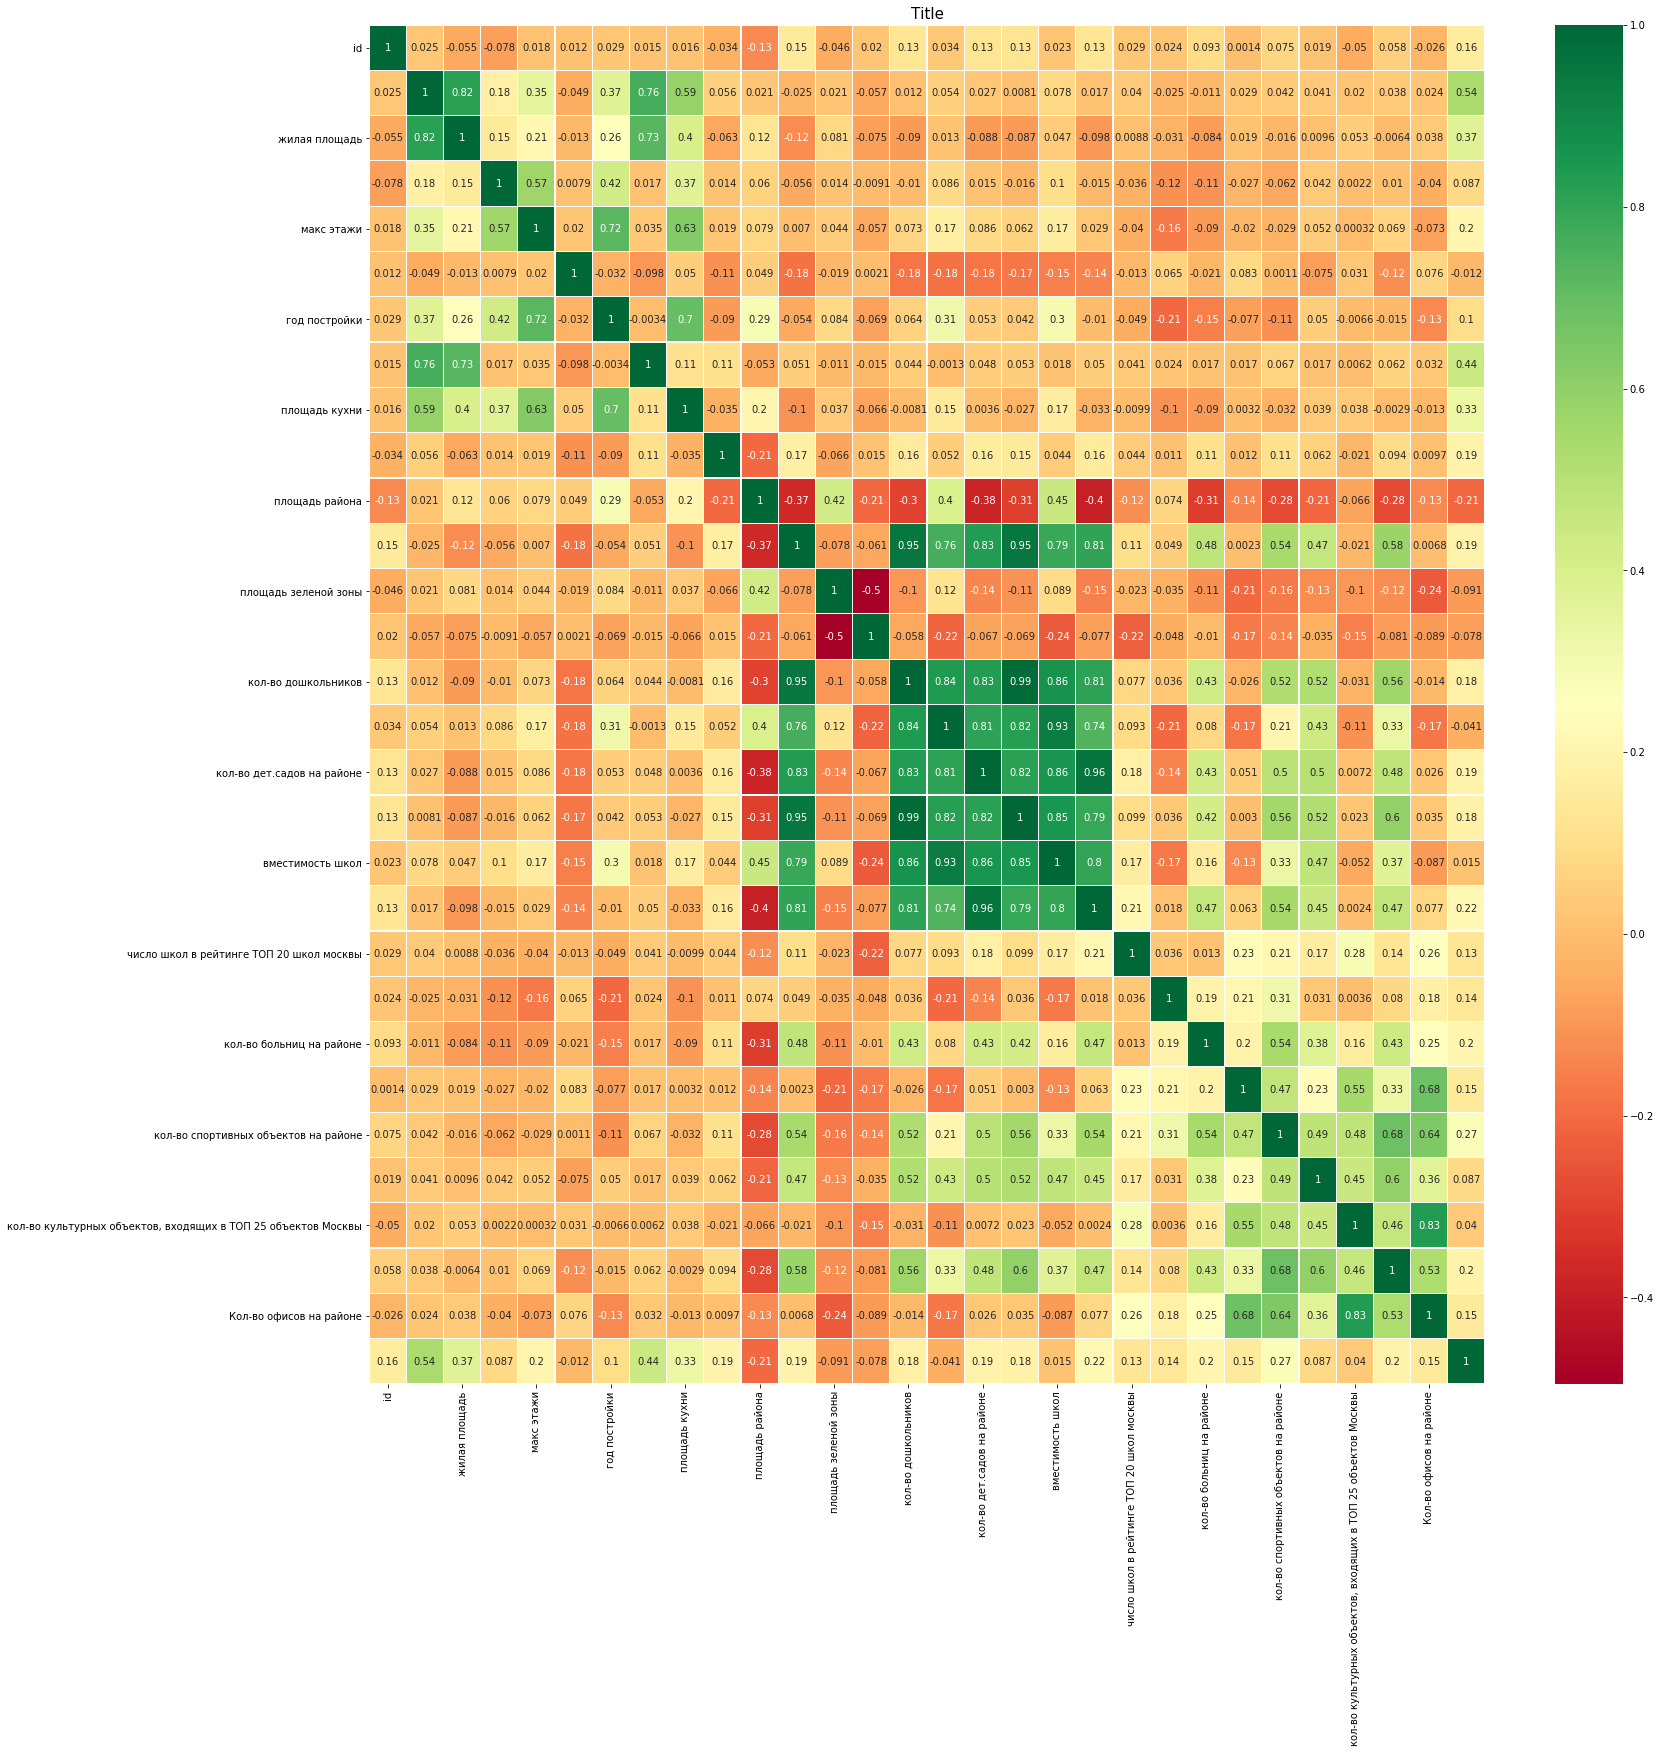

In [132]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('Title', y=1.75, size=15)
fig=plt.gcf()
fig.set_size_inches(25,25)
plt.show()

Видим что все что связано со школой сильно коррелирует между собой. Оставим один признак, тот что наиболее связан с ценой -это количествео школ. Остальные удалим.

In [133]:
data.columns

Index(['id', 'timestamp', 'площадь', 'жилая площадь', 'этаж', 'макс этажи',
       'из чего изготовлен', 'год постройки', 'число комнат', 'площадь кухни',
       'состояние жилья', 'тип жилья', 'район', 'площадь района',
       'чисо жителей', 'площадь зеленой зоны', 'площадь индустриальной зоны',
       'кол-во дошкольников', 'вместимость дет.садов',
       'кол-во дет.садов на районе', 'кол-во школьников', 'вместимость школ',
       'кол-во школ на районе', 'число школ в рейтинге ТОП 20 школ москвы',
       'кол-во больничных коек на райоене', 'кол-во больниц на районе',
       'число университетов в ТОП 20 университетов москвы',
       'кол-во спортивных объектов на районе',
       'кол-во школ допольнительного обучения на районе',
       'есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы',
       'кол-во культурных объектов, входящих в ТОП 25 объектов Москвы',
       'Кол-во торговых центров на районе', 'Кол-во офисов на районе',
       'цена_продажа'],
     

Если данные содержат пропущенные значения, то имеется две простые альтернативы:

удалить столбцы с такими значениями (data = data.dropna(axis=1)),
удалить строки с такими значениями (data = data.dropna(axis=0))

In [134]:
# во избежание избыточности признаков удалим некоторые признаки:
# на всякий случай сделаем копию датафрейма 

df_main = data.copy()
drop_elements = ['вместимость дет.садов', 'кол-во школьников', 'вместимость школ', 
                 'число школ в рейтинге ТОП 20 школ москвы','кол-во дошкольников']
df_main = df_main.drop(drop_elements, axis=1)

# И еще удалим  признаки, у которых: 
# - очень слабые "связи", и они могут испортить наши модели, внеся шум.

drop_elements2 = ['id','timestamp','кол-во больничных коек на райоене']
df_main = df_main.drop(drop_elements2, axis=1)
data=df_main

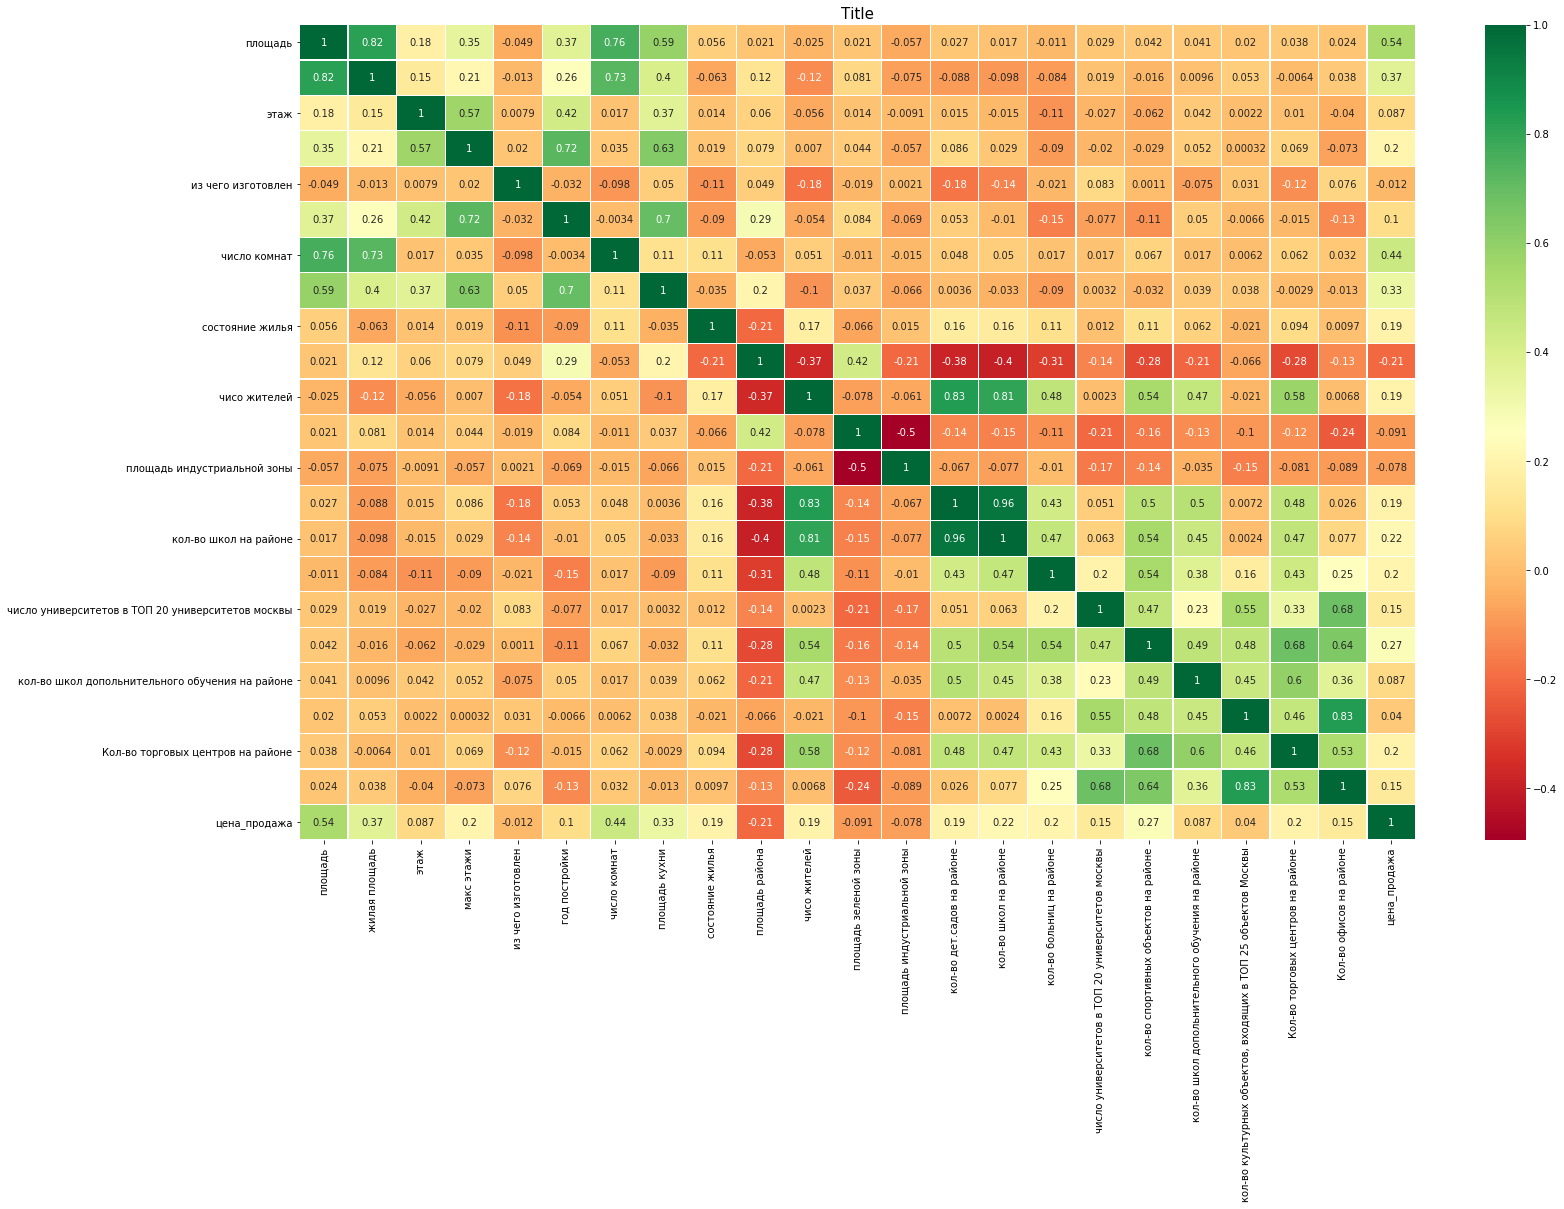

In [135]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.title('Title', y=1.75, size=15)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

Переведем категориальный признаки в числовые. Просмотрим данные типа objekt и datetime64

In [136]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print ("Cat",categorical_columns)
print ("----")
print ("Num",numerical_columns)
data[categorical_columns].describe()

Cat ['тип жилья', 'район', 'есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы']
----
Num ['площадь', 'жилая площадь', 'этаж', 'макс этажи', 'из чего изготовлен', 'год постройки', 'число комнат', 'площадь кухни', 'состояние жилья', 'площадь района', 'чисо жителей', 'площадь зеленой зоны', 'площадь индустриальной зоны', 'кол-во дет.садов на районе', 'кол-во школ на районе', 'кол-во больниц на районе', 'число университетов в ТОП 20 университетов москвы', 'кол-во спортивных объектов на районе', 'кол-во школ допольнительного обучения на районе', 'кол-во культурных объектов, входящих в ТОП 25 объектов Москвы', 'Кол-во торговых центров на районе', 'Кол-во офисов на районе', 'цена_продажа']


,тип жилья,район,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы"
count,15557,15557,15557
unique,2,145,2
top,Investment,Poselenie Sosenskoe,no
freq,11519,925,14772


In [137]:
for c in categorical_columns:
    print (data[c].unique())

['Investment' 'OwnerOccupier']
['Bibirevo' "Tekstil'shhiki" 'Mitino' 'Basmannoe' 'Nizhegorodskoe'
 'Koptevo' 'Kuncevo' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' 'Kosino-Uhtomskoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino'
 'Severnoe Tushino' 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' 'Caricyno'
 'Danilovskoe' 'Preobrazhenskoe' "Kon'kovo" 'Brateevo'
 'Vostochnoe Izmajlovo' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 "Chertanovo Central'noe" 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo'
 'Rostokino' 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe'
 'Vyhino-Zhulebino' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan'
 'Babushkinskoe' 'Staroe Krjukovo' 'Pokrovskoe Streshnevo'
 'Filevskij Park' 'Severnoe Butovo' 'Hamovniki' 'Solncevo' 'Lianozovo'
 'Zapadnoe Degunino' 'Pechatniki' 'Krjukovo' 'Dmitrovskoe' 'Jasenevo'
 'Rjazanskij' 'Silino' 'Golovinskoe' 'Ivanovskoe' 'Novokosino' 'Taganskoe'
 'Birjulevo Vostochnoe' 'Severnoe 

In [138]:
data['тип жилья'].value_counts(dropna=False) 

Investment       11519
OwnerOccupier     4038
Name: тип жилья, dtype: int64

In [139]:
data['есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы'].value_counts(dropna=False) 

no     14772
yes      785
Name: есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы, dtype: int64

По остальным объектам (дата , районы) понятно что вариаций будем много.

In [140]:
# удалим нулевой столбец, он не нужен
df = data
#df = df.drop(columns='id')

# половой признак переведем в числа
df['тип жилья'] = df['тип жилья'].map({'Investment': 0, 
                                 'OwnerOccupier': 1}).astype(int)

# С помощью цилка для колонок с 2-мя категориями: 'yes' или 'no'
list_yes_no = ['есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы']
for column in list_yes_no:
    df[column] = df[column].map({'no': 0, 
                                 'yes': 1}).astype(int)
    
#df['timestamp']=df['timestamp'].dt.year если нужно в дату

#там где много признаков    
le = preprocessing.LabelEncoder()
le.fit(df['район'])
df['район']=le.transform(df['район'])
#list(le.inverse_transform(df['район'])) # обратное декодирование
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Однако у нас есть еще два категориальный признака - tenure и MonthlyCharges, количество месяцев пользования услугами и месячный размер оплаты.

Без анализа видно что месяцев слишком много чтобы разбивать их на категории, тоже и со вторым признаком. Поэтому разобьем их.

Эксперементальным путем из графика видно, что на большее количество разбивать смысла нет -4 оптимально. (Меняем bins=4 для изучения)


In [141]:
correlations_data = data.corr()['цена_продажа'].sort_values()
correlations_data

тип жилья                                                                  -0.215389
площадь района                                                             -0.208768
район                                                                      -0.105812
площадь зеленой зоны                                                       -0.090507
площадь индустриальной зоны                                                -0.077514
из чего изготовлен                                                         -0.012130
кол-во культурных объектов, входящих в ТОП 25 объектов Москвы               0.039902
этаж                                                                        0.086571
кол-во школ допольнительного обучения на районе                             0.087059
год постройки                                                               0.099927
есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы    0.125881
число университетов в ТОП 20 университетов москвы                

In [142]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [143]:
#df.final_pmt_date.fillna(0, inplace=True)

df = df.fillna(data.median(axis=0), axis=0)
#df.fillna(0, inplace=True) 
df

,площадь,жилая площадь,этаж,макс этажи,из чего изготовлен,год постройки,число комнат,площадь кухни,состояние жилья,тип жилья,...,кол-во школ на районе,кол-во больниц на районе,число университетов в ТОП 20 университетов москвы,кол-во спортивных объектов на районе,кол-во школ допольнительного обучения на районе,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы","кол-во культурных объектов, входящих в ТОП 25 объектов Москвы",Кол-во торговых центров на районе,Кол-во офисов на районе,цена_продажа
0,43,27.000000,4.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,5,1,0,7,3,0,0,16,1,5850000
2,43,29.000000,2.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,7,1,0,5,1,0,0,0,1,5700000
3,89,50.000000,9.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,10,1,0,17,6,0,0,11,4,13100000
4,77,77.000000,4.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,9,4,2,25,2,0,0,10,93,16331452
5,67,46.000000,14.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,3,0,0,7,0,0,0,6,19,9100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24988,43,27.000000,7.0,9.0,1.0,1967.0,2.0,5.0,2.0,0,...,3,0,0,3,2,0,0,5,3,7100000
24989,64,41.644218,10.0,1.0,4.0,1977.0,2.0,10.0,2.0,1,...,0,0,0,0,3,0,0,1,0,4839296
24991,31,20.000000,1.0,5.0,1.0,1967.0,1.0,5.0,2.0,0,...,5,3,0,1,2,0,0,5,0,5100000
24995,51,30.000000,8.0,12.0,1.0,1966.0,2.0,10.0,2.0,0,...,3,0,0,3,2,0,0,5,3,8100000


In [144]:

# standardize the data attributes
#df['цена_продажа'] = preprocessing.scale(df['цена_продажа'])
df

,площадь,жилая площадь,этаж,макс этажи,из чего изготовлен,год постройки,число комнат,площадь кухни,состояние жилья,тип жилья,...,кол-во школ на районе,кол-во больниц на районе,число университетов в ТОП 20 университетов москвы,кол-во спортивных объектов на районе,кол-во школ допольнительного обучения на районе,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы","кол-во культурных объектов, входящих в ТОП 25 объектов Москвы",Кол-во торговых центров на районе,Кол-во офисов на районе,цена_продажа
0,43,27.000000,4.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,5,1,0,7,3,0,0,16,1,5850000
2,43,29.000000,2.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,7,1,0,5,1,0,0,0,1,5700000
3,89,50.000000,9.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,10,1,0,17,6,0,0,11,4,13100000
4,77,77.000000,4.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,9,4,2,25,2,0,0,10,93,16331452
5,67,46.000000,14.0,12.0,1.0,1977.0,2.0,8.0,2.0,0,...,3,0,0,7,0,0,0,6,19,9100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24988,43,27.000000,7.0,9.0,1.0,1967.0,2.0,5.0,2.0,0,...,3,0,0,3,2,0,0,5,3,7100000
24989,64,41.644218,10.0,1.0,4.0,1977.0,2.0,10.0,2.0,1,...,0,0,0,0,3,0,0,1,0,4839296
24991,31,20.000000,1.0,5.0,1.0,1967.0,1.0,5.0,2.0,0,...,5,3,0,1,2,0,0,5,0,5100000
24995,51,30.000000,8.0,12.0,1.0,1966.0,2.0,10.0,2.0,0,...,3,0,0,3,2,0,0,5,3,8100000


In [180]:
# dataframe = df['цена_продажа']
# array = df['цена_продажа'].values.reshape(-1, 1).astype(np.float64)
# data_scaler = StandardScaler().fit(array)
# data_rescaled = data_scaler.transform(array)
# data_rescaled2 = MinMaxScaler().fit_transform(array)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
df['цена_продажа'] = min_max_scaler.fit_transform(df[['цена_продажа']])
df['цена_продажа']

0         5.179662
2         5.044540
3        11.710539
4        14.621466
5         8.107297
           ...    
24988     6.305675
24989     4.269209
24991     4.504054
24995     7.206486
24996     7.215258
Name: цена_продажа, Length: 15557, dtype: float64

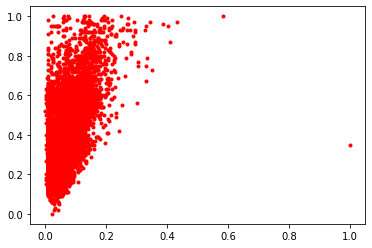

0.5353867156534032


In [172]:
#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['цена_продажа', 'площадь']])
df_norm = pd.DataFrame(np_scaled)
#print(df_norm[:5])
volume = df_norm[0]
bags = df_norm[1]
plt.plot(volume, bags, 'r.')
plt.show()

from scipy.stats import pearsonr
corr, p_value = pearsonr(df['цена_продажа'], df['площадь'])
print(corr)

Поверхностный анализ показывает что признаки с пропущенными даннымми и некоторые столбцы не существенно влияют на конечный результат. В боевой задаче мы бы изучили и разбили их на группы но сейчас просто заполним нулями или удалим для упрощения модели.

### Приступем к обучению модели


In [146]:
X = df.drop(['цена_продажа'], axis=1)
y = df['цена_продажа']
# зададим параметры для всех обучающих признаков 
TEST_SIZE = 0.3 
RAND_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [619]:
# GradientBoostingClassifier 
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
predicted_y = gbc.predict(X_test)# здесь будет храниться весь массив предсказанных ответов
print('Accuracy: {:.2f}'.format(gbc.score(X_test, y_test)))

# здесь будет храниться весь массив предсказанных ответов
y_test_preds_gbc = gbc.predict(X) 

ValueError: Unknown label type: 'continuous'

In [620]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=40)
tree.fit(X_train, y_train)
predicted_y = tree.predict(X_test)
print('Accuracy: {:.2f}'.format(tree.score(X_test, y_test)))
y_test_preds_tree = tree.predict(X) # здесь будет храниться весь массив предсказанных ответов

ValueError: Unknown label type: 'continuous'

In [181]:
# GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted_y = clf.predict(X_test)
y_test_preds_clf = clf.predict(X) # здесь будет храниться весь массив предсказанных ответов
print('Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy: 0.01


In [147]:
# LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state=40)
classifier.fit(X_train, y_train)
predicted_y = classifier.predict(X_test)
print('Accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))
y_test_preds_classifier = gbc.predict(X) # здесь будет храниться весь массив предсказанных ответов

KeyboardInterrupt: 